In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import pearsonr, kendalltau,spearmanr
from scipy.stats import skew, kurtosis
from scipy.stats import f_oneway
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, ConfusionMatrixDisplay

In [2]:
data=pd.read_csv('iris.csv')

In [3]:
data.head(5)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
DATA=data.copy()
DATA.head(5)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
DATA=DATA.rename(columns={'SepalLength':'LoS',
                     'SepalWidth':'LaS',
                     'PetalLength':'LoP',
                     'PetalWidth':'LaP',
                     'Name':'Nom'})
DATA.head(5)

,LoS,LaS,LoP,LaP,Nom
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
DATA.isnull().sum()

LoS    0
LaS    0
LoP    0
LaP    0
Nom    0
dtype: int64

In [7]:
DATA.shape

(150, 5)

In [8]:
len(DATA)-len(DATA.drop_duplicates())

3

In [9]:
DATA[DATA.duplicated()]

,LoS,LaS,LoP,LaP,Nom
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [10]:
Data=DATA.drop_duplicates(keep='first')

In [11]:
Data.shape

(147, 5)

In [12]:
len(Data)-len(Data.drop_duplicates())

0

Nous n'avons plus de doublons dans la nouvelle base de données

1) les données maquantes

2) les doublons

3) les données aberrantes


In [13]:
Nom_var=Data.columns
Nom_var

Index(['LoS', 'LaS', 'LoP', 'LaP', 'Nom'], dtype='object')

In [14]:
###Variables explicatives : variables exogènes
Xt=Data[Nom_var[0:4]]

####Variables expliquées : variables endogènes
yt=Data[Nom_var[4]]
yt.head(5)

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Nom, dtype: object

In [15]:
##Déterminer les modalités des variables
yt.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [16]:
help(plt.boxplot)

Help on function boxplot in module matplotlib.pyplot:

boxplot(x, notch=None, sym=None, vert=None, whis=None, positions=None, widths=None, patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, meanline=None, showmeans=None, showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None, *, data=None)
    Draw a box and whisker plot.
    
    The box extends from the first quartile (Q1) to the third
    quartile (Q3) of the data, with a line at the median.  The
    whiskers extend from the box by 1.5x the inter-quartile range
    (IQR).  Flier points are those past the end of the whiskers.
    See https://en.wikipedia.org/wiki/Box_plot for reference.
    
    .. code-block:: none
    
              Q1-1.5IQR   Q1   median  Q3   Q3+1.5IQR
                           |-----:-----|
           o      |--------|     :     |--------

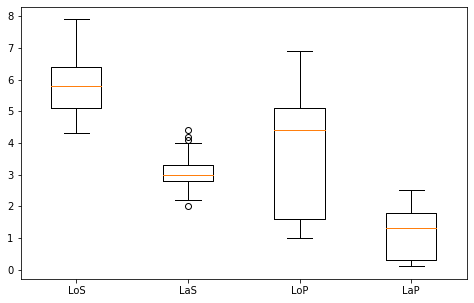

In [17]:
plt.figure(figsize=(8,5))
_=plt.boxplot(Data[Nom_var[0:4]],vert=True,labels=Nom_var[0:4])

In [18]:
T=sorted(Data[Nom_var[1]])
print(T[0],T[-3:])

2.0 [4.1, 4.2, 4.4]


In [19]:
seto=Data[yt=='Iris-setosa']
versi=Data[yt=='Iris-versicolor']
virgi=Data[yt=='Iris-virginica']
print(seto.shape[0],versi.shape[0],virgi.shape[0])

48 50 49


In [20]:
help(sns.pairplot)

Help on function pairplot in module seaborn.axisgrid:

pairplot(data, *, hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, kind='scatter', diag_kind='auto', markers=None, height=2.5, aspect=1, corner=False, dropna=False, plot_kws=None, diag_kws=None, grid_kws=None, size=None)
    Plot pairwise relationships in a dataset.
    
    By default, this function will create a grid of Axes such that each numeric
    variable in ``data`` will by shared across the y-axes across a single row and
    the x-axes across a single column. The diagonal plots are treated
    differently: a univariate distribution plot is drawn to show the marginal
    distribution of the data in each column.
    
    It is also possible to show a subset of variables or plot different
    variables on the rows and columns.
    
    This is a high-level interface for :class:`PairGrid` that is intended to
    make it easy to draw a few common styles. You should use :class:`PairGrid`
    directly 

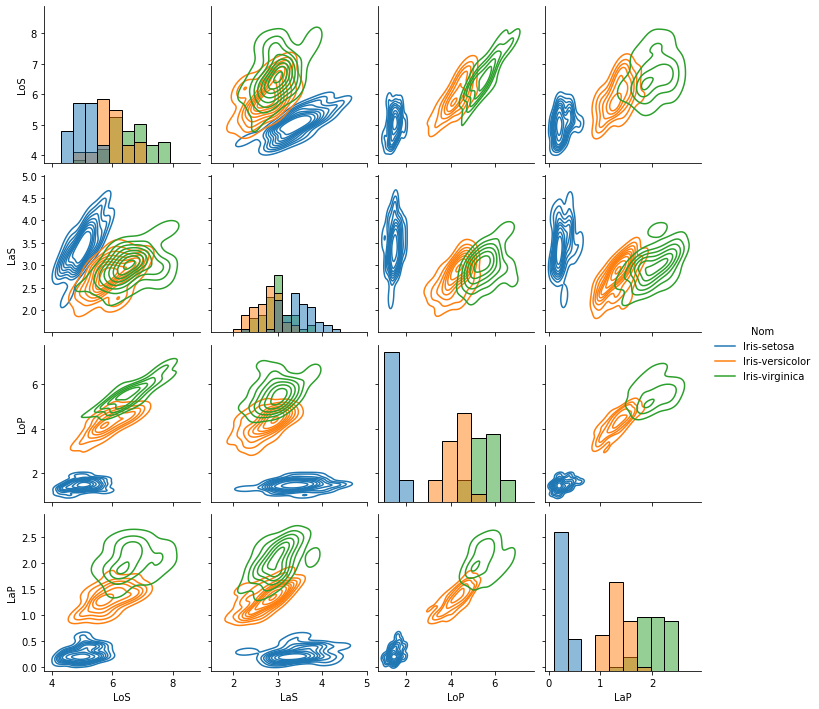

In [21]:
sns.pairplot(Data,hue='Nom',kind='kde',diag_kind='hist')
plt.show()

In [22]:
pip list

Package                       Version
----------------------------- --------------------
aiohttp                       3.8.1
aiosignal                     1.2.0
alabaster                     0.7.12
anaconda-client               1.9.0
anaconda-navigator            2.4.2
anaconda-project              0.10.2
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.6.6
astropy                       5.0.4
asttokens                     2.0.5
async-timeout                 4.0.1
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.9.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcrypt                        3.2.0
bea

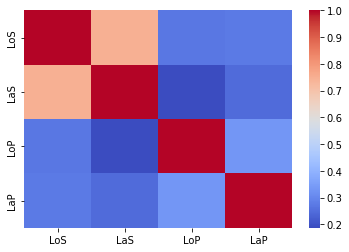

In [23]:
M_set=seto[Nom_var[0:4]].corr()


plt.figure()
sns.heatmap(M_set, cmap = 'coolwarm')
plt.show()

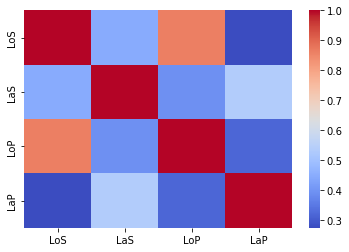

In [24]:
M_virgi=virgi[Nom_var[0:4]].corr()
plt.figure()
sns.heatmap(M_virgi, cmap = 'coolwarm')
plt.show()

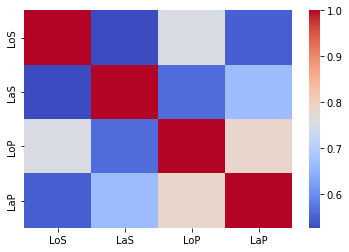

In [25]:
M_versi=versi[Nom_var[0:4]].corr()
plt.figure()
sns.heatmap(M_versi, cmap = 'coolwarm')
plt.show()

In [26]:
pearsonr(seto['LaS'],seto['LoP'])[1]*100

20.3091662413558

In [27]:
for i in range(0,3):
    for j in range(i+1,4):
        print(Nom_var[i],Nom_var[j],pearsonr(seto[Nom_var[i]],seto[Nom_var[j]])[1]*100)

#pearsonr(seto[Nom_var[0]],seto[Nom_var[1]])

LoS LaS 9.418675838382009e-08
LoS LoP 6.62738344304898
LoS LaP 6.036193580174612
LaS LoP 20.3091662413558
LaS LaP 9.268606237531836
LoP LaP 2.139049723489791


In [28]:
help(spearmanr)

Help on function spearmanr in module scipy.stats.stats:

spearmanr(a, b=None, axis=0, nan_policy='propagate', alternative='two-sided')
    Calculate a Spearman correlation coefficient with associated p-value.
    
    The Spearman rank-order correlation coefficient is a nonparametric measure
    of the monotonicity of the relationship between two datasets. Unlike the
    Pearson correlation, the Spearman correlation does not assume that both
    datasets are normally distributed. Like other correlation coefficients,
    this one varies between -1 and +1 with 0 implying no correlation.
    Correlations of -1 or +1 imply an exact monotonic relationship. Positive
    correlations imply that as x increases, so does y. Negative correlations
    imply that as x increases, y decreases.
    
    The p-value roughly indicates the probability of an uncorrelated system
    producing datasets that have a Spearman correlation at least as extreme
    as the one computed from these datasets. The p-va

In [29]:
spearmanr(seto['LoS'],seto['LaS']).pvalue

1.5615114500396913e-10

In [30]:
for i in range(0,3):
    for j in range(i+1,4):
        print(Nom_var[i],Nom_var[j],spearmanr(seto[Nom_var[i]],seto[Nom_var[j]]).pvalue*100)

LoS LaS 1.5615114500396914e-08
LoS LoP 5.49257254711206
LoS LaP 5.042749937047617
LaS LoP 18.10092359400578
LaS LaP 2.7033338514530287
LoP LaP 6.361609221150967


In [31]:
help(kendalltau)

Help on function kendalltau in module scipy.stats.stats:

kendalltau(x, y, initial_lexsort=None, nan_policy='propagate', method='auto', variant='b')
    Calculate Kendall's tau, a correlation measure for ordinal data.
    
    Kendall's tau is a measure of the correspondence between two rankings.
    Values close to 1 indicate strong agreement, and values close to -1
    indicate strong disagreement. This implements two variants of Kendall's
    tau: tau-b (the default) and tau-c (also known as Stuart's tau-c). These
    differ only in how they are normalized to lie within the range -1 to 1;
    the hypothesis tests (their p-values) are identical. Kendall's original
    tau-a is not implemented separately because both tau-b and tau-c reduce
    to tau-a in the absence of ties.
    
    Parameters
    ----------
    x, y : array_like
        Arrays of rankings, of the same shape. If arrays are not 1-D, they
        will be flattened to 1-D.
    initial_lexsort : bool, optional
        U

In [32]:
kendalltau(seto['LoS'],seto['LaS']).pvalue

9.753042446800271e-09

In [33]:
for i in range(0,3):
    for j in range(i+1,4):
        print(Nom_var[i],Nom_var[j],kendalltau(seto[Nom_var[i]],seto[Nom_var[j]]).pvalue*100)

LoS LaS 9.75304244680027e-07
LoS LoP 5.152908154261244
LoS LaP 5.70916125475979
LaS LoP 16.46903274950938
LaS LaP 2.4133613069139783
LoP LaP 6.633057542133787


In [34]:
pear=[]
spea=[]
kend=[]
val1=[]
val2=[]
for i in range(0,3):
    for j in range(i+1,4):
        val1.append(Nom_var[i])
        val2.append(Nom_var[j])
        pear.append(pearsonr(seto[Nom_var[i]],seto[Nom_var[j]])[1]*100)
        spea.append(spearmanr(seto[Nom_var[i]],seto[Nom_var[j]]).pvalue*100)
        kend.append(kendalltau(seto[Nom_var[i]],seto[Nom_var[j]]).pvalue*100)
        
Dt=pd.DataFrame({
    'variable_1': val1,
    'variable_2' : val2,
    'pvalue_pearson':pear,
    'pvalue_spearman': spea,
    'pvalue_kendall':kend
})
Dt

,variable_1,variable_2,pvalue_pearson,pvalue_spearman,pvalue_kendall
0,LoS,LaS,9.418676e-08,1.561511e-08,9.753042e-07
1,LoS,LoP,6.627383e+00,5.492573e+00,5.152908e+00
2,LoS,LaP,6.036194e+00,5.042750e+00,5.709161e+00
3,LaS,LoP,2.030917e+01,1.810092e+01,1.646903e+01
4,LaS,LaP,9.268606e+00,2.703334e+00,2.413361e+00
5,LoP,LaP,2.139050e+00,6.361609e+00,6.633058e+00


In [35]:
Pear=[]
Spea=[]
Kend=[]
Val1=[]
Val2=[]
for i in range(0,3):
    for j in range(i+1,4):
        Val1.append(Nom_var[i])
        Val2.append(Nom_var[j])
        Pear.append(pearsonr(virgi[Nom_var[i]],virgi[Nom_var[j]])[1]*100)
        Spea.append(spearmanr(virgi[Nom_var[i]],virgi[Nom_var[j]]).pvalue*100)
        Kend.append(kendalltau(virgi[Nom_var[i]],virgi[Nom_var[j]]).pvalue*100)
        
Dt=pd.DataFrame({
    'variable_1': Val1,
    'variable_2' : Val2,
    'pvalue_pearson':Pear,
    'pvalue_spearman': Spea,
    'pvalue_kendall':Kend
})
Dt

,variable_1,variable_2,pvalue_pearson,pvalue_spearman,pvalue_kendall
0,LoS,LaS,1.326438e-01,4.033127e-01,5.984994e-01
1,LoS,LoP,1.552180e-13,4.268848e-11,8.115141e-09
2,LoS,LaP,5.649944e+00,3.101846e+00,3.814156e+00
3,LaS,LoP,5.312009e-01,8.689928e-01,8.216936e-01
4,LaS,LaP,7.534559e-03,5.265899e-03,1.034451e-02
5,LoP,LaP,2.636715e+00,1.256780e+00,1.236732e+00


In [36]:
Par=[]
Sea=[]
Knd=[]
Vl1=[]
Vl2=[]
for i in range(0,3):
    for j in range(i+1,4):
        Vl1.append(Nom_var[i])
        Vl2.append(Nom_var[j])
        Par.append(pearsonr(versi[Nom_var[i]],versi[Nom_var[j]])[1]*100)
        Sea.append(spearmanr(versi[Nom_var[i]],versi[Nom_var[j]]).pvalue*100)
        Knd.append(kendalltau(versi[Nom_var[i]],versi[Nom_var[j]]).pvalue*100)
        
Dt=pd.DataFrame({
    'variable_1': Vl1,
    'variable_2' : Vl2,
    'pvalue_pearson':Par,
    'pvalue_spearman': Sea,
    'pvalue_kendall':Knd
})
Dt

,variable_1,variable_2,pvalue_pearson,pvalue_spearman,pvalue_kendall
0,LoS,LaS,8.771860e-03,1.183863e-02,1.142294e-02
1,LoS,LoP,2.586190e-08,1.075213e-07,2.727170e-06
2,LoS,LaP,4.035422e-03,3.699680e-03,1.444788e-02
3,LaS,LoP,2.302168e-03,1.271710e-03,3.215621e-03
4,LaS,LaP,1.466661e-05,1.851009e-05,2.987596e-05
5,LoP,LaP,1.271916e-09,1.229065e-09,1.285570e-07


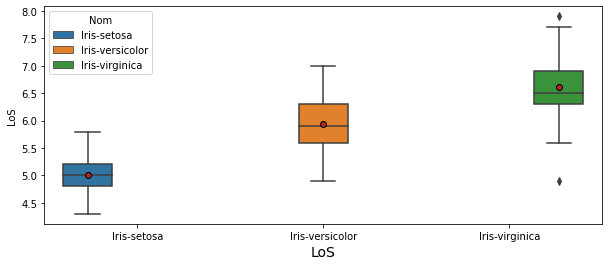

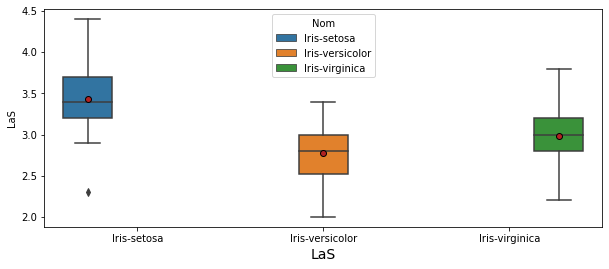

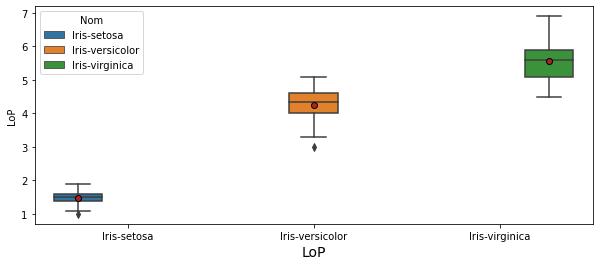

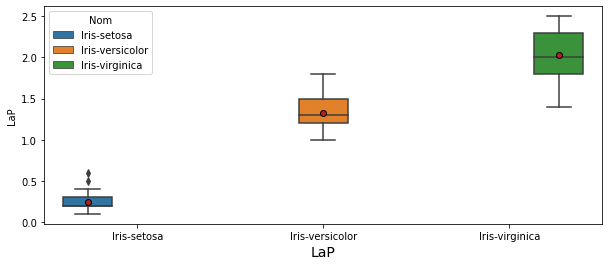

In [37]:
for var in Nom_var[0:4]:
    plt.figure(figsize=(10,4))
    meanprops = {'marker':'o', 'markeredgecolor':'black','markerfacecolor':'firebrick'}
    sns.boxplot(x='Nom',y=var,data=Data,showmeans=True, meanprops=meanprops,hue='Nom')
    plt.xlabel(var, fontsize=14)
    plt.show()

Pour la variable LoS, 
-on observe des moyennes et les médianes différentes dans les trois classes. 
-pour  la fleur Setosa, on remarque visuellement une moyenne presque identique à la médiane
-pour les deux autres fleurs, les moyennes sont supérieures aux médianes
-les longueurs LoS supérieures sont pour la classe virginica suivie par la classe versicolor
Pour la variable LaS,
-la moyenne des fleurs setosa est supérieure à la médiane contrairement aux deux autres classes
-les largeurs LaS supérieures sont pour la classe setosa suivie par la classe virginica

In [38]:
seto.describe()

,LoS,LaS,LoP,LaP
count,48.000000,48.000000,48.000000,48.000000
mean,5.010417,3.431250,1.462500,0.250000
std,0.359219,0.383243,0.177002,0.105185
min,4.300000,2.300000,1.000000,0.100000
25%,4.800000,3.200000,1.400000,0.200000
50%,5.000000,3.400000,1.500000,0.200000
75%,5.200000,3.700000,1.600000,0.300000
max,5.800000,4.400000,1.900000,0.600000


In [39]:
virgi.describe()

,LoS,LaS,LoP,LaP
count,49.000000,49.000000,49.000000,49.000000
mean,6.604082,2.979592,5.561224,2.028571
std,0.632113,0.323380,0.553706,0.276887
min,4.900000,2.200000,4.500000,1.400000
25%,6.300000,2.800000,5.100000,1.800000
50%,6.500000,3.000000,5.600000,2.000000
75%,6.900000,3.200000,5.900000,2.300000
max,7.900000,3.800000,6.900000,2.500000


In [40]:
versi.describe()

,LoS,LaS,LoP,LaP
count,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000
std,0.516171,0.313798,0.469911,0.197753
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.525000,4.000000,1.200000
50%,5.900000,2.800000,4.350000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000


In [41]:
help(skew)

Help on function skew in module scipy.stats.stats:

skew(a, axis=0, bias=True, nan_policy='propagate')
    Compute the sample skewness of a data set.
    
    For normally distributed data, the skewness should be about zero. For
    unimodal continuous distributions, a skewness value greater than zero means
    that there is more weight in the right tail of the distribution. The
    function `skewtest` can be used to determine if the skewness value
    is close enough to zero, statistically speaking.
    
    Parameters
    ----------
    a : ndarray
        Input array.
    axis : int or None, optional
        Axis along which skewness is calculated. Default is 0.
        If None, compute over the whole array `a`.
    bias : bool, optional
        If False, then the calculations are corrected for statistical bias.
    nan_policy : {'propagate', 'raise', 'omit'}, optional
        Defines how to handle when input contains nan.
        The following options are available (default is 'pro

In [42]:
for var in Nom_var[0:4]:
    print('-----------------------')
    print(var,'|',skew(seto[var]))

-----------------------
LoS | 0.07858941336534009
-----------------------
LaS | 0.02611558306938696
-----------------------
LoP | 0.09378397708472495
-----------------------
LaP | 1.2194374789772018


In [43]:
help(kurtosis)

Help on function kurtosis in module scipy.stats.stats:

kurtosis(a, axis=0, fisher=True, bias=True, nan_policy='propagate')
    Compute the kurtosis (Fisher or Pearson) of a dataset.
    
    Kurtosis is the fourth central moment divided by the square of the
    variance. If Fisher's definition is used, then 3.0 is subtracted from
    the result to give 0.0 for a normal distribution.
    
    If bias is False then the kurtosis is calculated using k statistics to
    eliminate bias coming from biased moment estimators
    
    Use `kurtosistest` to see if result is close enough to normal.
    
    Parameters
    ----------
    a : array
        Data for which the kurtosis is calculated.
    axis : int or None, optional
        Axis along which the kurtosis is calculated. Default is 0.
        If None, compute over the whole array `a`.
    fisher : bool, optional
        If True, Fisher's definition is used (normal ==> 0.0). If False,
        Pearson's definition is used (normal ==> 3.0)

In [44]:
for var in Nom_var[0:4]:
    print(kurtosis(seto[var]))

-0.43738839294156184
0.7253812698002196
0.677255052302971
1.3846153846153832


In [45]:
Sk=[]
Kt=[]
VAR=[]
for i in range(0,4):
    VAR.append(Nom_var[i])
    Sk.append(skew(seto[Nom_var[i]]))
    Kt.append(kurtosis(seto[Nom_var[i]]))

Dd=pd.DataFrame({
    'variable': VAR,
    'Asymétrie' : Sk,
    'Applatissement' : Kt
})
Dd

,variable,Asymétrie,Applatissement
0,LoS,0.078589,-0.437388
1,LaS,0.026116,0.725381
2,LoP,0.093784,0.677255
3,LaP,1.219437,1.384615


In [46]:
SK=[]
KT=[]
VAR=[]
for i in range(0,4):
    VAR.append(Nom_var[i])
    SK.append(skew(versi[Nom_var[i]]))
    KT.append(kurtosis(versi[Nom_var[i]]))

DD=pd.DataFrame({
    'variable': VAR,
    'Asymétrie' : SK,
    'Applatissement' : KT
})
DD

,variable,Asymétrie,Applatissement
0,LoS,0.102190,-0.598827
1,LaS,-0.351867,-0.448272
2,LoP,-0.588159,-0.074402
3,LaP,-0.030236,-0.487833


In [47]:
Sw=[]
Ks=[]
VAR=[]
for i in range(0,4):
    VAR.append(Nom_var[i])
    Sw.append(skew(virgi[Nom_var[i]]))
    Ks.append(kurtosis(virgi[Nom_var[i]]))

DD=pd.DataFrame({
    'variable': VAR,
    'Asymétrie' : Sw,
    'Applatissement' : Ks
})
DD

,variable,Asymétrie,Applatissement
0,LoS,0.082602,-0.018327
1,LaS,0.319770,0.520322
2,LoP,0.499664,-0.279413
3,LaP,-0.151286,-0.683660


In [49]:
help(f_oneway)

Help on function f_oneway in module scipy.stats.stats:

f_oneway(*args, axis=0)
    Perform one-way ANOVA.
    
    The one-way ANOVA tests the null hypothesis that two or more groups have
    the same population mean.  The test is applied to samples from two or
    more groups, possibly with differing sizes.
    
    Parameters
    ----------
    sample1, sample2, ... : array_like
        The sample measurements for each group.  There must be at least
        two arguments.  If the arrays are multidimensional, then all the
        dimensions of the array must be the same except for `axis`.
    axis : int, optional
        Axis of the input arrays along which the test is applied.
        Default is 0.
    
    Returns
    -------
    statistic : float
        The computed F statistic of the test.
    pvalue : float
        The associated p-value from the F distribution.
    
    Warns
    -----
    F_onewayConstantInputWarning
        Raised if each of the input arrays is constant arra

In [55]:
help(stats.kruskal)

Help on function kruskal in module scipy.stats.stats:

kruskal(*args, nan_policy='propagate')
    Compute the Kruskal-Wallis H-test for independent samples.
    
    The Kruskal-Wallis H-test tests the null hypothesis that the population
    median of all of the groups are equal.  It is a non-parametric version of
    ANOVA.  The test works on 2 or more independent samples, which may have
    different sizes.  Note that rejecting the null hypothesis does not
    indicate which of the groups differs.  Post hoc comparisons between
    groups are required to determine which groups are different.
    
    Parameters
    ----------
    sample1, sample2, ... : array_like
       Two or more arrays with the sample measurements can be given as
       arguments. Samples must be one-dimensional.
    nan_policy : {'propagate', 'raise', 'omit'}, optional
        Defines how to handle when input contains nan.
        The following options are available (default is 'propagate'):
    
          * 'pro

In [57]:
for var in Nom_var[0:4]:
    print(var)
    print(f_oneway(seto[var],versi[var],virgi[var]).pvalue*100)
    print(stats.kruskal(seto[var],versi[var],virgi[var]).pvalue*100)
    print('---------------------------------------')

LoS
7.530911607751589e-29
2.9180867289945437e-19
---------------------------------------
LaS
1.1503376457786759e-14
3.5805008504991494e-12
---------------------------------------
LoP
8.180545708674454e-87
1.9068761503981644e-26
---------------------------------------
LaP
1.3529729471552314e-80
1.329034271729534e-26
---------------------------------------


<AxesSubplot:>

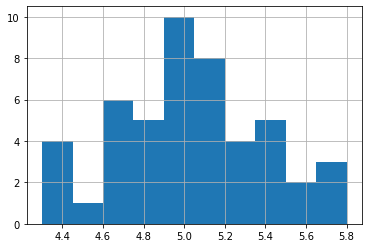

In [59]:
seto['LoS'].hist()

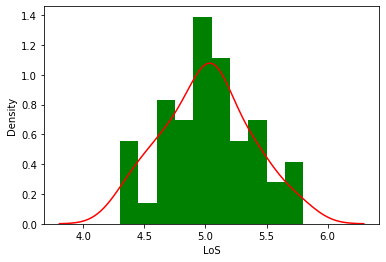

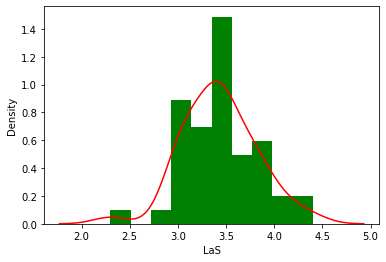

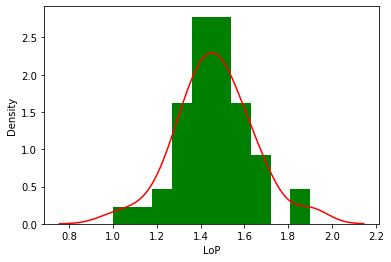

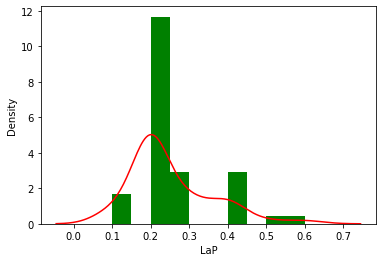

In [80]:
for var in Nom_var[0:4]:
    plt.figure()
    plt.hist(seto[var],bins=10,histtype='bar',color='green',density=True)
    sns.kdeplot(seto[var],color='red')
    plt.show

In [62]:
help(plt.hist)

Help on function hist in module matplotlib.pyplot:

hist(x, bins=None, range=None, density=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, *, data=None, **kwargs)
    Plot a histogram.
    
    Compute and draw the histogram of *x*.  The return value is a tuple
    (*n*, *bins*, *patches*) or ([*n0*, *n1*, ...], *bins*, [*patches0*,
    *patches1*, ...]) if the input contains multiple data.  See the
    documentation of the *weights* parameter to draw a histogram of
    already-binned data.
    
    Multiple data can be provided via *x* as a list of datasets
    of potentially different length ([*x0*, *x1*, ...]), or as
    a 2D ndarray in which each column is a dataset.  Note that
    the ndarray form is transposed relative to the list form.
    
    Masked arrays are not supported.
    
    The *bins*, *range*, *weights*, and *density* parameters behave as in
    `n

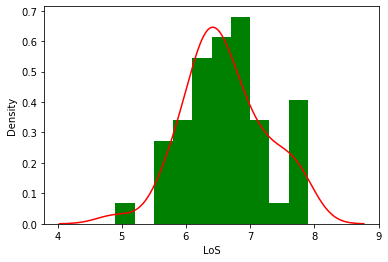

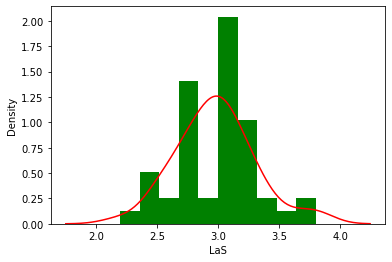

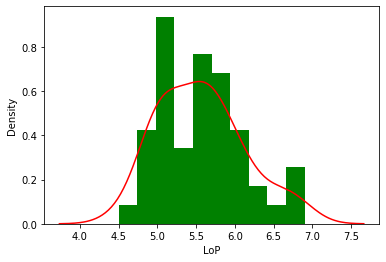

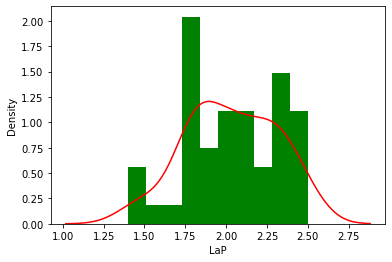

In [82]:
for var in Nom_var[0:4]:
    plt.figure()
    plt.hist(virgi[var],bins=10,histtype='bar',color='green',density=True)
    sns.kdeplot(virgi[var],color='red')
    plt.show

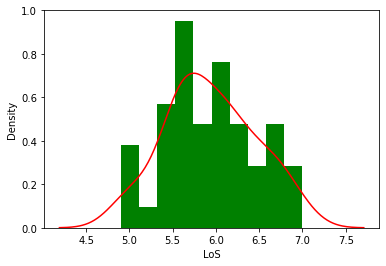

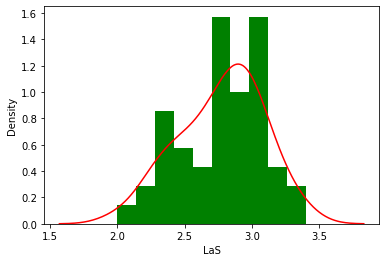

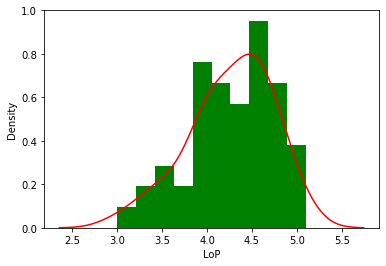

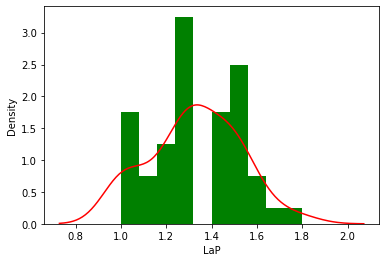

In [83]:
for var in Nom_var[0:4]:
    plt.figure()
    plt.hist(versi[var],bins=10,histtype='bar',color='green',density=True)
    sns.kdeplot(versi[var],color='red')
    plt.show

In [84]:
help(stats.shapiro)

Help on function shapiro in module scipy.stats.morestats:

shapiro(x)
    Perform the Shapiro-Wilk test for normality.
    
    The Shapiro-Wilk test tests the null hypothesis that the
    data was drawn from a normal distribution.
    
    Parameters
    ----------
    x : array_like
        Array of sample data.
    
    Returns
    -------
    statistic : float
        The test statistic.
    p-value : float
        The p-value for the hypothesis test.
    
    See Also
    --------
    anderson : The Anderson-Darling test for normality
    kstest : The Kolmogorov-Smirnov test for goodness of fit.
    
    Notes
    -----
    The algorithm used is described in [4]_ but censoring parameters as
    described are not implemented. For N > 5000 the W test statistic is accurate
    but the p-value may not be.
    
    The chance of rejecting the null hypothesis when it is true is close to 5%
    regardless of sample size.
    
    References
    ----------
    .. [1] https://www.itl.nist.

In [89]:
stats.shapiro(seto['LoS']).pvalue

0.43793225288391113

In [91]:
pv_seto=[]
pv_virgi=[]
pv_versi=[]
for var in Nom_var[0:4]:
    pv_seto.append(stats.shapiro(seto[var]).pvalue*100)
    pv_virgi.append(stats.shapiro(virgi[var]).pvalue*100)
    pv_versi.append(stats.shapiro(versi[var]).pvalue*100)
    
Df=pd.DataFrame({
    'variable': Nom_var[0:4],
    'setosa' : pv_seto,
    'virginica':pv_virgi,
    'versicolor' : pv_versi
})

Df

,variable,setosa,virginica,versicolor
0,LoS,43.793225,25.332147,46.473265
1,LaS,28.498977,18.717012,33.798879
2,LoP,8.838225,15.974092,15.848334
3,LaP,0.000104,8.484112,2.727822


In [93]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.
    
    Quick utility that wraps input validation and
    ``next(ShuffleSplit().split(X, y))`` and application to input data
    into a single call for splitting (and optionally subsampling) data in a
    oneliner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to 

In [96]:
X_train, X_test, y_train, y_test = train_test_split(Data[Nom_var[0:4]],Data[Nom_var[4]],test_size=0.2,random_state=42)

In [112]:
y_train.shape

(117,)

In [105]:
help(BernoulliNB)

Help on class BernoulliNB in module sklearn.naive_bayes:

class BernoulliNB(_BaseDiscreteNB)
 |  BernoulliNB(*, alpha=1.0, binarize=0.0, fit_prior=True, class_prior=None)
 |  
 |  Naive Bayes classifier for multivariate Bernoulli models.
 |  
 |  Like MultinomialNB, this classifier is suitable for discrete data. The
 |  difference is that while MultinomialNB works with occurrence counts,
 |  BernoulliNB is designed for binary/boolean features.
 |  
 |  Read more in the :ref:`User Guide <bernoulli_naive_bayes>`.
 |  
 |  Parameters
 |  ----------
 |  alpha : float, default=1.0
 |      Additive (Laplace/Lidstone) smoothing parameter
 |      (0 for no smoothing).
 |  
 |  binarize : float or None, default=0.0
 |      Threshold for binarizing (mapping to booleans) of sample features.
 |      If None, input is presumed to already consist of binary vectors.
 |  
 |  fit_prior : bool, default=True
 |      Whether to learn class prior probabilities or not.
 |      If false, a uniform prior wil

In [106]:
model1=BernoulliNB()

In [107]:
model1.fit(X_train,y_train)

BernoulliNB()

In [108]:
model1.get_params()

{'alpha': 1.0, 'binarize': 0.0, 'class_prior': None, 'fit_prior': True}

In [118]:
res1=model1.predict(X_train)
res2=model1.predict(X_test)

ac1=accuracy_score(y_train,res1)*100
ac2=accuracy_score(y_test,res2)*100

print(ac1,ac2)

34.18803418803419 33.33333333333333


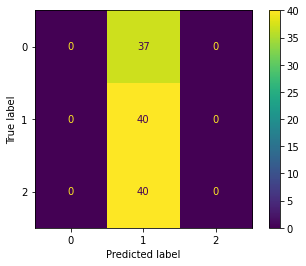

In [119]:
cm1=confusion_matrix(y_train, res1)
cm_display = ConfusionMatrixDisplay(cm1).plot()

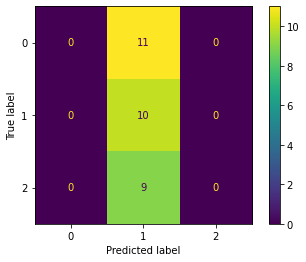

In [121]:
cm2=confusion_matrix(y_test, res2)
cm_display = ConfusionMatrixDisplay(cm2).plot()